# Importing Libraies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import cv2
import joblib as jb
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
warnings.filterwarnings('ignore')

# Acessing & Mapping Data

In [16]:
df = pd.read_csv('emnist-letters-train.csv' , header=None)
char_map = pd.read_csv('emnist-letters-mapping.txt' , delimiter=' ', header=None , index_col=0 , squeeze=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,114,125,82,37,37,39,115,157,94,21,10,32,37,37,37,37,37,37,37,82,125,114,20,0,0,0,3,109,245,249,233,217,217,217,245,251,234,172,142,203,217,217,217,217,217,217,217,233,249,245,109,3,0,0,4,114,253,254,254,254,254,254,254,254,254,252,251,254,254,254,254,254,254,254,254,254,254,254,127,4,0,0,0,45,214,233,251,254,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,254,254,251,113,4,0,0,0,0,5,22,82,128,160,184,217,217,218,249,254,255,255,255,255,255,254,254,247,216,170,83,7,0,0,0,0,0,0,0,2,5,16,25,37,40,50,227,254,255,255,254,254,252,245,220,159,38,21,3,0,0,0,0,0,0,0,0,0,0,0,0,9,77,140,247,254,254,254,254,244,177,114,50,20,0,0,0,0,0,0,0,0,0,0,0,0,0,3,34,175,246,254,254,254,253,221,115,46,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,34,84,175,251,254,254,253,234,202,91,4,0,0,0,0,0,0,0,0,0,0

In [17]:
mapping = {}
for index, label in enumerate(char_map):
    mapping[index] = chr(label)

In [18]:
mapping

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

# Preprocessing

In [19]:
X_df = df.iloc[:,1:]
y_df = df.iloc[ : , 0 ]

In [20]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [21]:
X_df = np.asarray(X_df)
X_df = np.apply_along_axis(rotate, 1, X_df)

In [22]:
X_df.shape

(88800, 28, 28)

In [23]:
nsamples, nx, ny = X_df.shape
X_df = X_df.reshape(nsamples,nx*ny)

# Loading Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size= 0.15, random_state=42)

DecesionTree = jb.load("DT.sav")
RandomForest = jb.load("RF.sav")

# Models Evolution

In [55]:
y_pred_DT = DecesionTree.predict(X_df)

y_pred_RF = RandomForest.predict(X_df)

DT_Score = accuracy_score(y_pred_DT,y_df)

RF_Score = accuracy_score(y_pred_RF,y_df)

In [56]:
print(y_pred_DT.shape, y_pred_RF.shape,y_test.shape)

(88800,) (88800,) (13320,)


In [59]:
print(f'Random Forest model score: {(RF_Score*100):.2f}%')
print(f'Decisoion Tree model score: {DT_Score*100:.2f}%')

Random Forest model score: 87.30%
Decisoion Tree model score: 74.07%


# Cross Validation

In [109]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import joblib as jb

# Your existing code
print('K-fold Cross Validation')
# Define the number of folds (k)
num_folds = 5  # You can adjust this based on your preference

# Create a stratified k-fold object
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores for Decision Tree and Random Forest
dt_scores = []
rf_scores = []

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_df, y_df), 1):
    X_train, X_test = X_df[train_index], X_df[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Your existing code for rotating images
    
    # Load the models
    decision_tree = jb.load("DT.sav")
    random_forest = jb.load("RF.sav")

    # Make predictions
    y_pred_dt = decision_tree.predict(X_test)
    y_pred_rf = random_forest.predict(X_test)

    # Calculate accuracy scores
    dt_score = accuracy_score(y_pred_dt, y_test)
    rf_score = accuracy_score(y_pred_rf, y_test)

    # Append scores to the lists
    dt_scores.append(dt_score)
    rf_scores.append(rf_score)

    # Print accuracy scores for each fold
    print(f"Fold {fold}: Decision Tree Accuracy: {dt_score:.4f}, Random Forest Accuracy: {rf_score:.4f}")

# Calculate and print the average accuracy scores for Decision Tree and Random Forest
average_dt_score = np.mean(dt_scores)
average_rf_score = np.mean(rf_scores)

print(f"\nAverage Decision Tree Accuracy: {average_dt_score:.4f}")
print(f"Average Random Forest Accuracy: {average_rf_score:.4f}")


K-fold Cross Validation
Fold 1: Decision Tree Accuracy: 0.7432, Random Forest Accuracy: 0.8771
Fold 2: Decision Tree Accuracy: 0.7410, Random Forest Accuracy: 0.8726
Fold 3: Decision Tree Accuracy: 0.7323, Random Forest Accuracy: 0.8697
Fold 4: Decision Tree Accuracy: 0.7414, Random Forest Accuracy: 0.8745
Fold 5: Decision Tree Accuracy: 0.7453, Random Forest Accuracy: 0.8712

Average Decision Tree Accuracy: 0.7407
Average Random Forest Accuracy: 0.8730


# Visualizing the Evolution

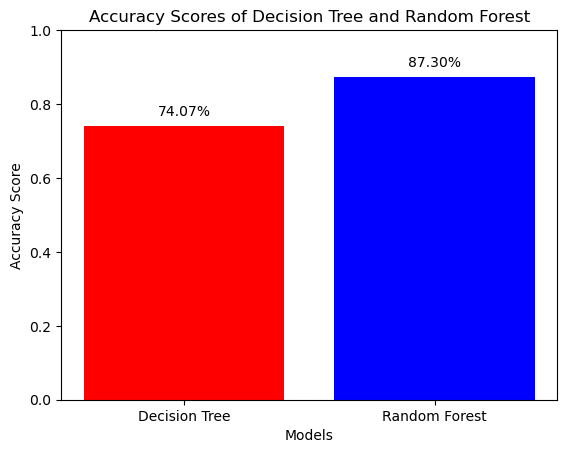

In [58]:
models = ['Decision Tree', 'Random Forest']
scores = [DT_Score, RF_Score]
plt.bar(models, scores, color=['red','blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Decision Tree and Random Forest')
plt.ylim(0, 1)  # Set the y-axis limit to match the accuracy range [0, 1]

# Display the scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score*100:.2f}%', ha='center', va='bottom')

plt.show()

### Classification Results Report 

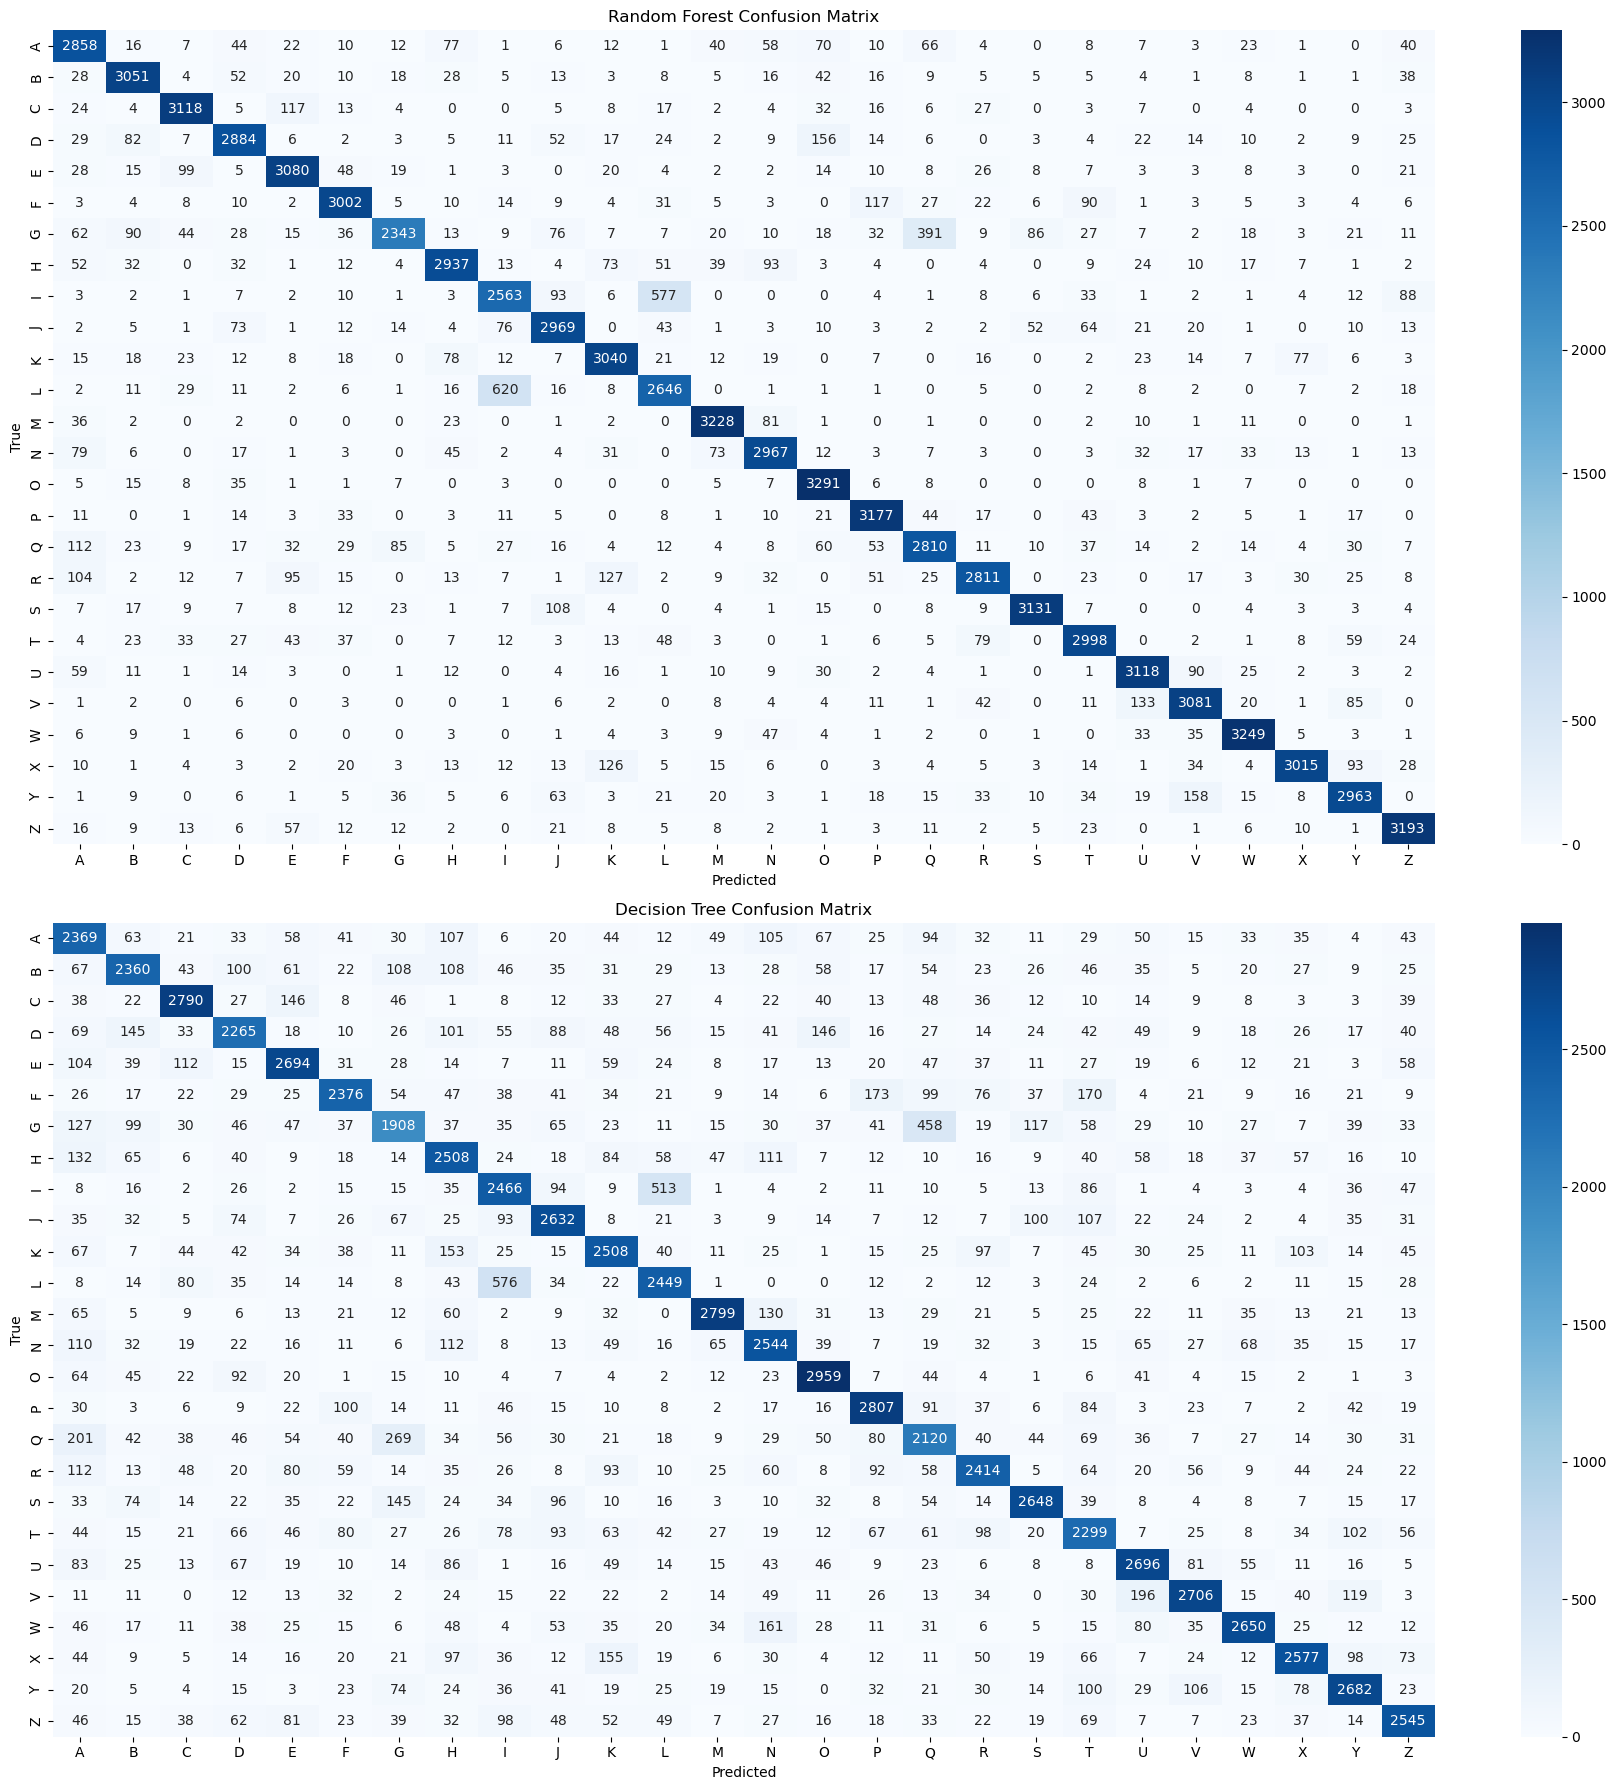

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_pred_RF and y_pred_DT defined somewhere in your code

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 18))

# Confusion Matrix for Random Forest
cf_RF = confusion_matrix(y_df, y_pred_RF)
sns.heatmap(cf_RF, annot=True, fmt='d', cmap='Blues', xticklabels=mapping.values(), yticklabels=mapping.values(), ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')



# Confusion Matrix for Decision Tree
cf_DT = confusion_matrix(y_df, y_pred_DT)
sns.heatmap(cf_DT, annot=True, fmt='d', cmap='Blues', xticklabels=mapping.values(), yticklabels=mapping.values(), ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Adjust layout
plt.tight_layout()
plt.show()


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
import joblib as jb
import pandas as pd
import numpy as np

# Assuming your labels are binary (0 and 1)
class_labels = [0, 1]

# Classification Report for Decision Tree
print("Classification Report - Decision Tree:\n", classification_report(y_test, y_pred_DT, target_names=mapping.values()))
print('\n=============================================================================================================\n')
# Classification Report for Random Forest
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_RF, target_names=mapping.values()))


Classification Report - Decision Tree:
               precision    recall  f1-score   support

           A       0.61      0.71      0.66       519
           B       0.72      0.72      0.72       474
           C       0.80      0.78      0.79       525
           D       0.72      0.67      0.69       494
           E       0.76      0.76      0.76       489
           F       0.79      0.71      0.75       526
           G       0.61      0.55      0.58       502
           H       0.63      0.74      0.68       505
           I       0.66      0.70      0.68       507
           J       0.77      0.75      0.76       506
           K       0.70      0.74      0.72       516
           L       0.70      0.75      0.73       527
           M       0.89      0.86      0.88       500
           N       0.70      0.74      0.72       494
           O       0.79      0.88      0.83       480
           P       0.80      0.81      0.80       546
           Q       0.62      0.65      0.

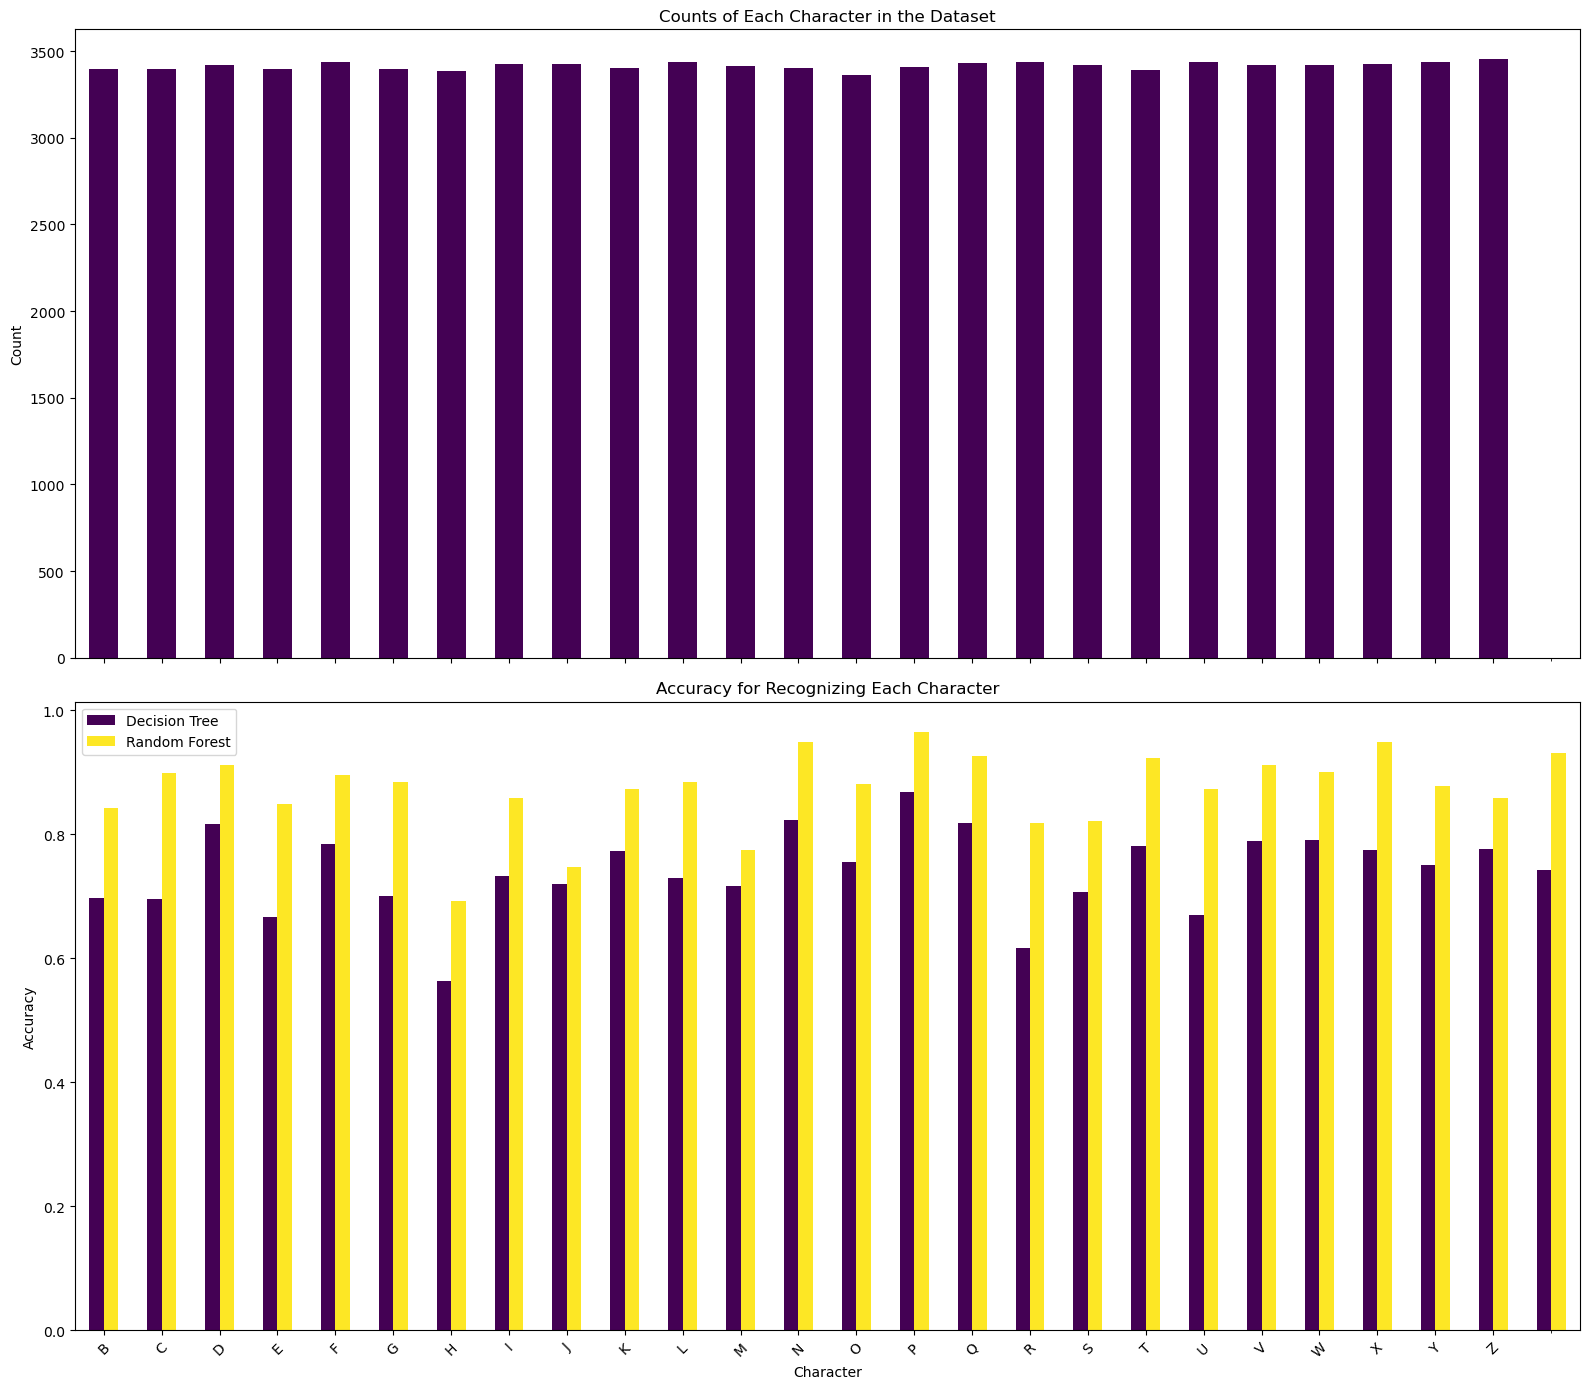

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

# Assuming your data and models are already loaded

# Create a figure and a single subplot with shared x-axis
fig, axs = plt.subplots(2, 1, figsize=(16, 14), sharex=True)

# Plot the counts of each character with mapping
df_mapped = df.iloc[:, 0].map(mapping)
counts_plot = df_mapped.value_counts().sort_index().plot(kind='bar', colormap='viridis', ax=axs[0])
axs[0].set_title('Counts of Each Character in the Dataset')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Character')

# Calculate accuracy for each character
accuracy_DT = {}
accuracy_RF = {}

for char_label, char_name in mapping.items():
    indices_char = y_df[y_df == char_label + 1].index.intersection(y_df.index).tolist()
    accuracy_DT[char_name] = accuracy_score(y_pred_DT[indices_char], y_df.iloc[indices_char])
    accuracy_RF[char_name] = accuracy_score(y_pred_RF[indices_char], y_df.iloc[indices_char])

# Convert results to a DataFrame for plotting
df_accuracy = pd.DataFrame({'Decision Tree': accuracy_DT, 'Random Forest': accuracy_RF})

# Plot the bar plot
accuracy_plot = df_accuracy.plot(kind='bar', rot=45, colormap='viridis', ax=axs[1])
axs[1].set_title('Accuracy for Recognizing Each Character')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Character')

# Add x-axis labels to the first plot
counts_plot.set_xticks(range(len(df_mapped.value_counts())))
counts_plot.set_xticklabels(df_mapped.value_counts().sort_index().index)

plt.tight_layout()
plt.show()
